In [43]:
text='''In this Notebook I wanted to explore the World Happiness. As basic file I found the files World 
happiness report which shows how happy contries are in time, and the world-hapiness-report 2021 which shows
us different data to world regions, to world countries, which shows us how much they feel happy. In 
addition to that there are additional data to further life aspects such as GDP per capita, life expectancy
and social support and so on. The questions I was interessted in here were how and if at all single life 
aspects such as those mentioned above correlate to the score of happiness of regions and counrties. 
These questions I tried to answer with the visualization in diffrent graphics.'''

print(text)

In this Notebook I wanted to explore the World Happiness. As basic file I found the files World 
happiness report which shows how happy contries are in time, and the world-hapiness-report 2021 which shows
us different data to world regions, to world countries, which shows us how much they feel happy. In 
addition to that there are additional data to further life aspects such as GDP per capita, life expectancy
and social support and so on. The questions I was interessted in here were how and if at all single life 
aspects such as those mentioned above correlate to the score of happiness of regions and counrties. 
These questions I tried to answer with the visualization in diffrent graphics.


In [15]:
import os
import zipfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx


from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# Source: http://blog.districtdatalabs.com/data-exploration-with-python-1

In [16]:
wh=pd.read_csv('/Users/KaidiCui/Desktop/Python/assignment3/worldhappiness/world-happiness-report-2021.csv')

In [17]:
wh.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [18]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [19]:
wh.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [20]:
wh.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [21]:
wh.groupby('Regional indicator').upperwhisker.sum().sort_values()

Regional indicator
North America and ANZ                  28.852
South Asia                             31.845
East Asia                              35.337
Southeast Asia                         49.550
Commonwealth of Independent States     66.701
Middle East and North Africa           90.630
Central and Eastern Europe            103.359
Latin America and Caribbean           121.056
Western Europe                        146.886
Sub-Saharan Africa                    167.337
Name: upperwhisker, dtype: float64

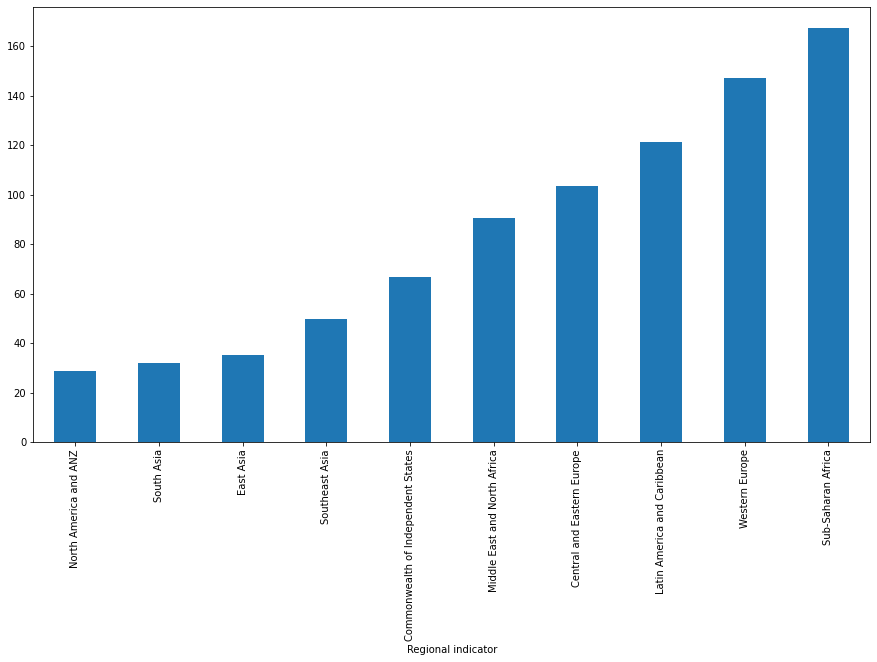

In [22]:
var = wh.groupby('Regional indicator').upperwhisker.sum().sort_values() 
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)


var.plot(kind='bar');

<AxesSubplot:xlabel='Regional indicator'>

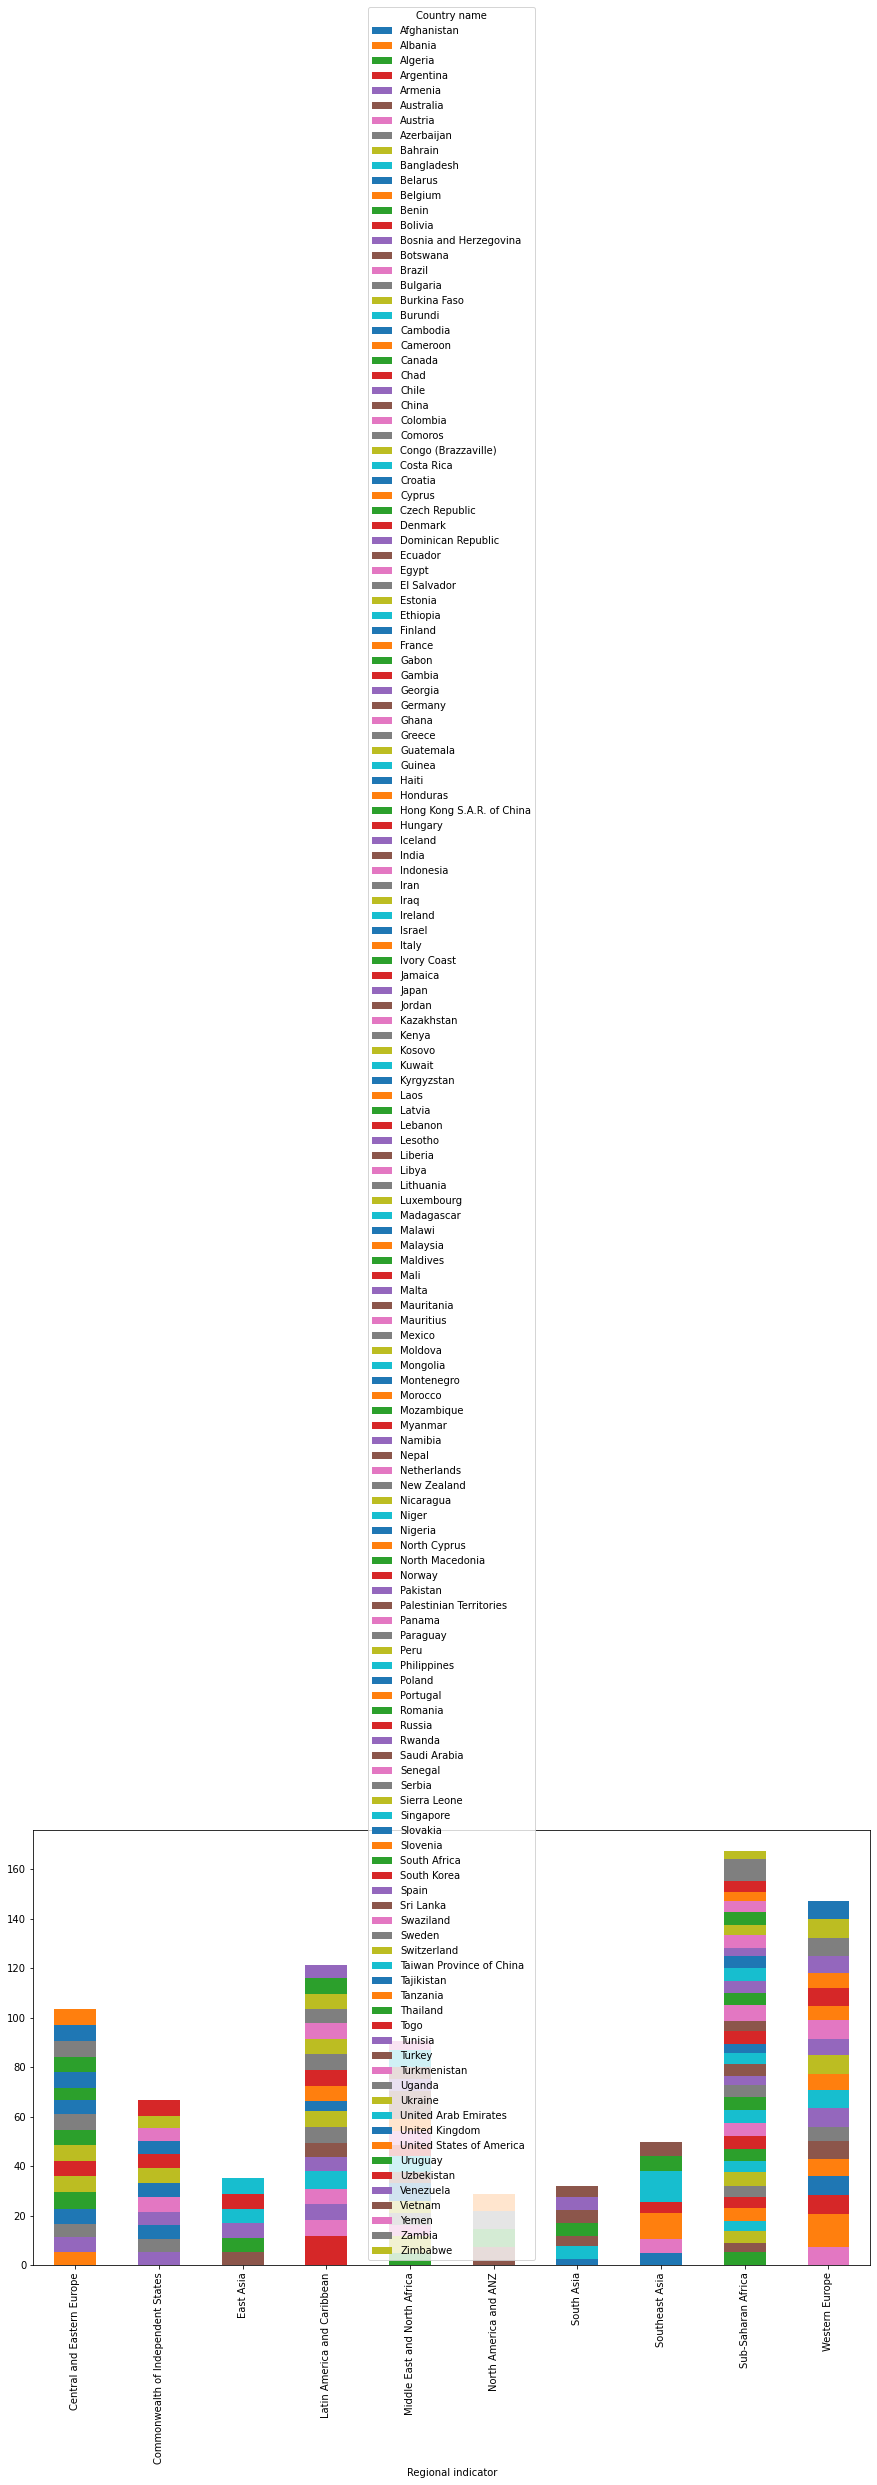

In [27]:
var = wh.groupby(['Regional indicator','Country name']).upperwhisker.sum().sort_values()
var.unstack().plot(kind='bar',stacked=True, grid=False, figsize=(15,8))

In [28]:
total_gdp = wh.pivot_table('Logged GDP per capita', index='Country name', aggfunc=sum)

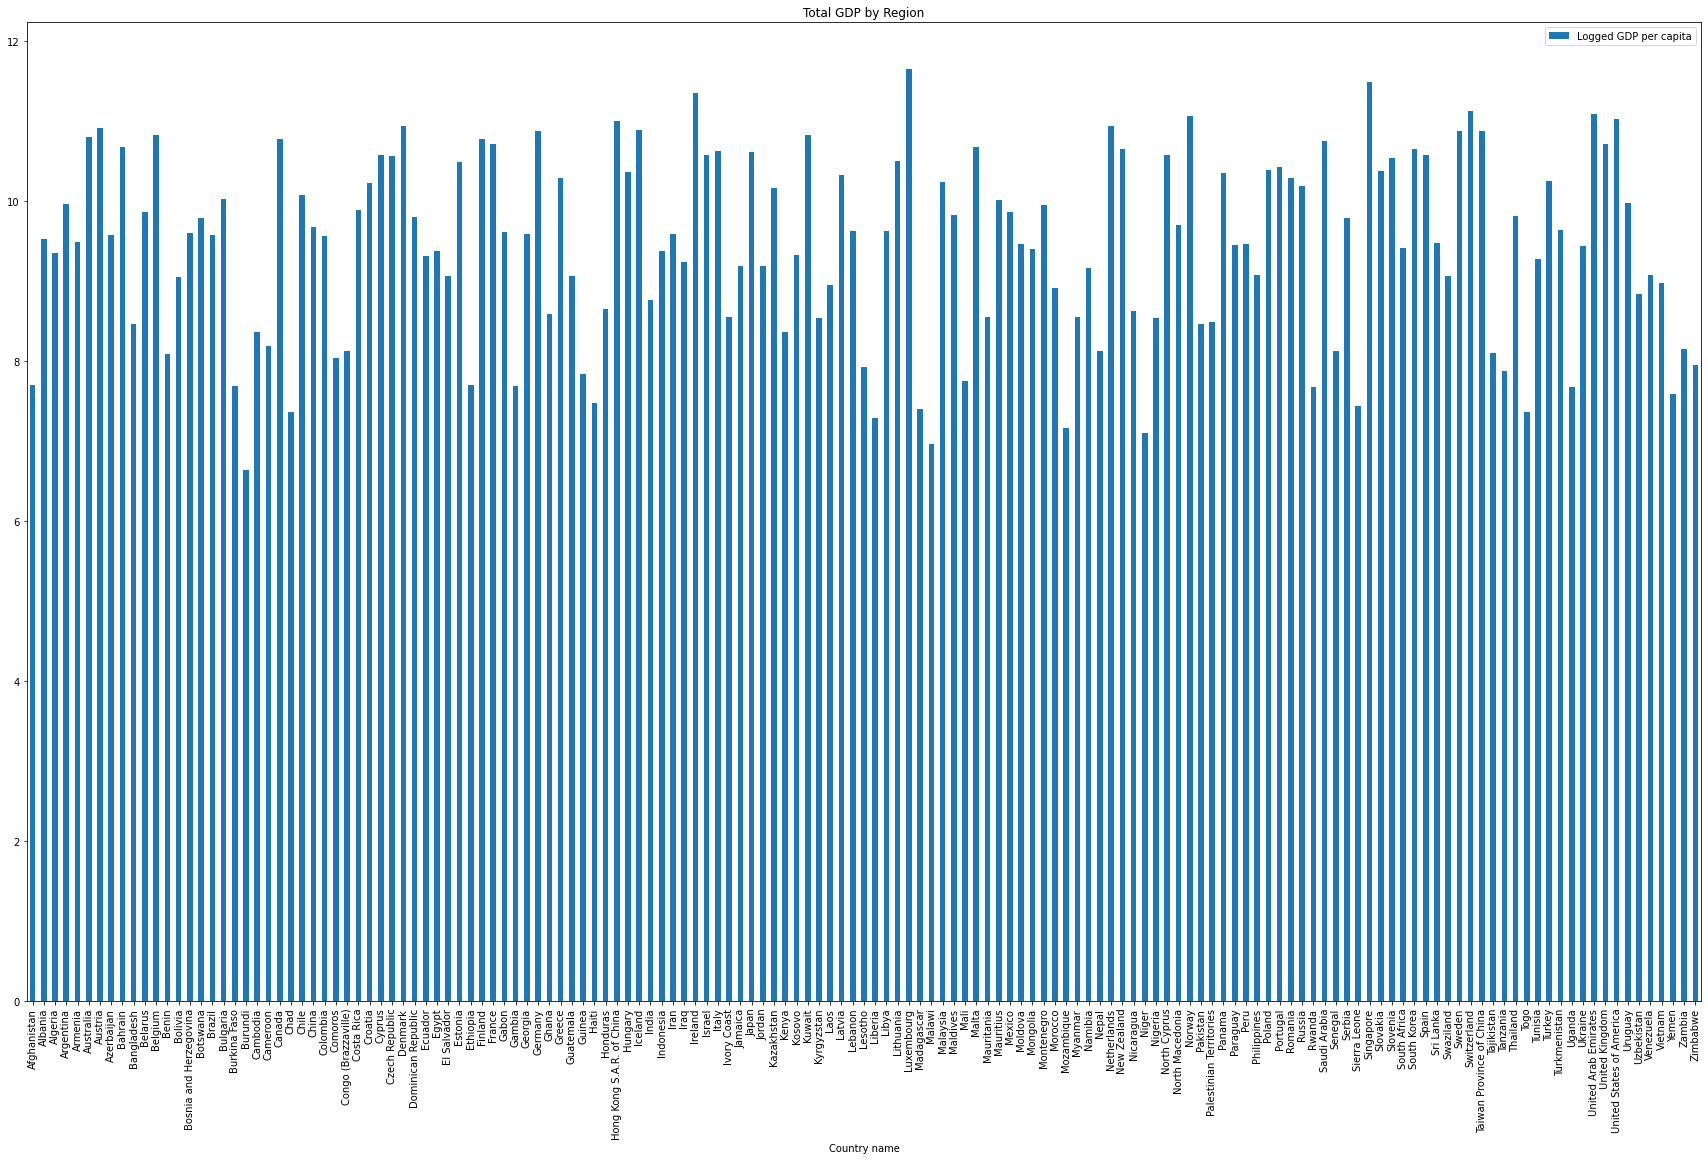

In [25]:
total_gdp.plot(kind='bar', title='Total GDP by Region', figsize=(30,18));

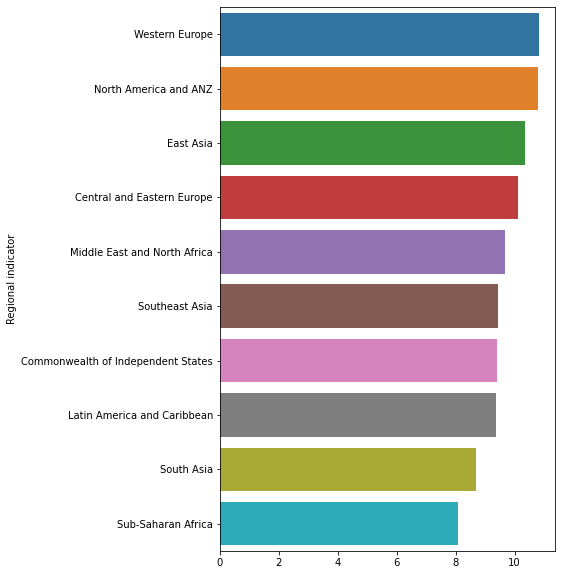

In [31]:
plt.figure(figsize=(6,10))
x=wh.groupby("Regional indicator")["Logged GDP per capita"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=x.values,y=x.index)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


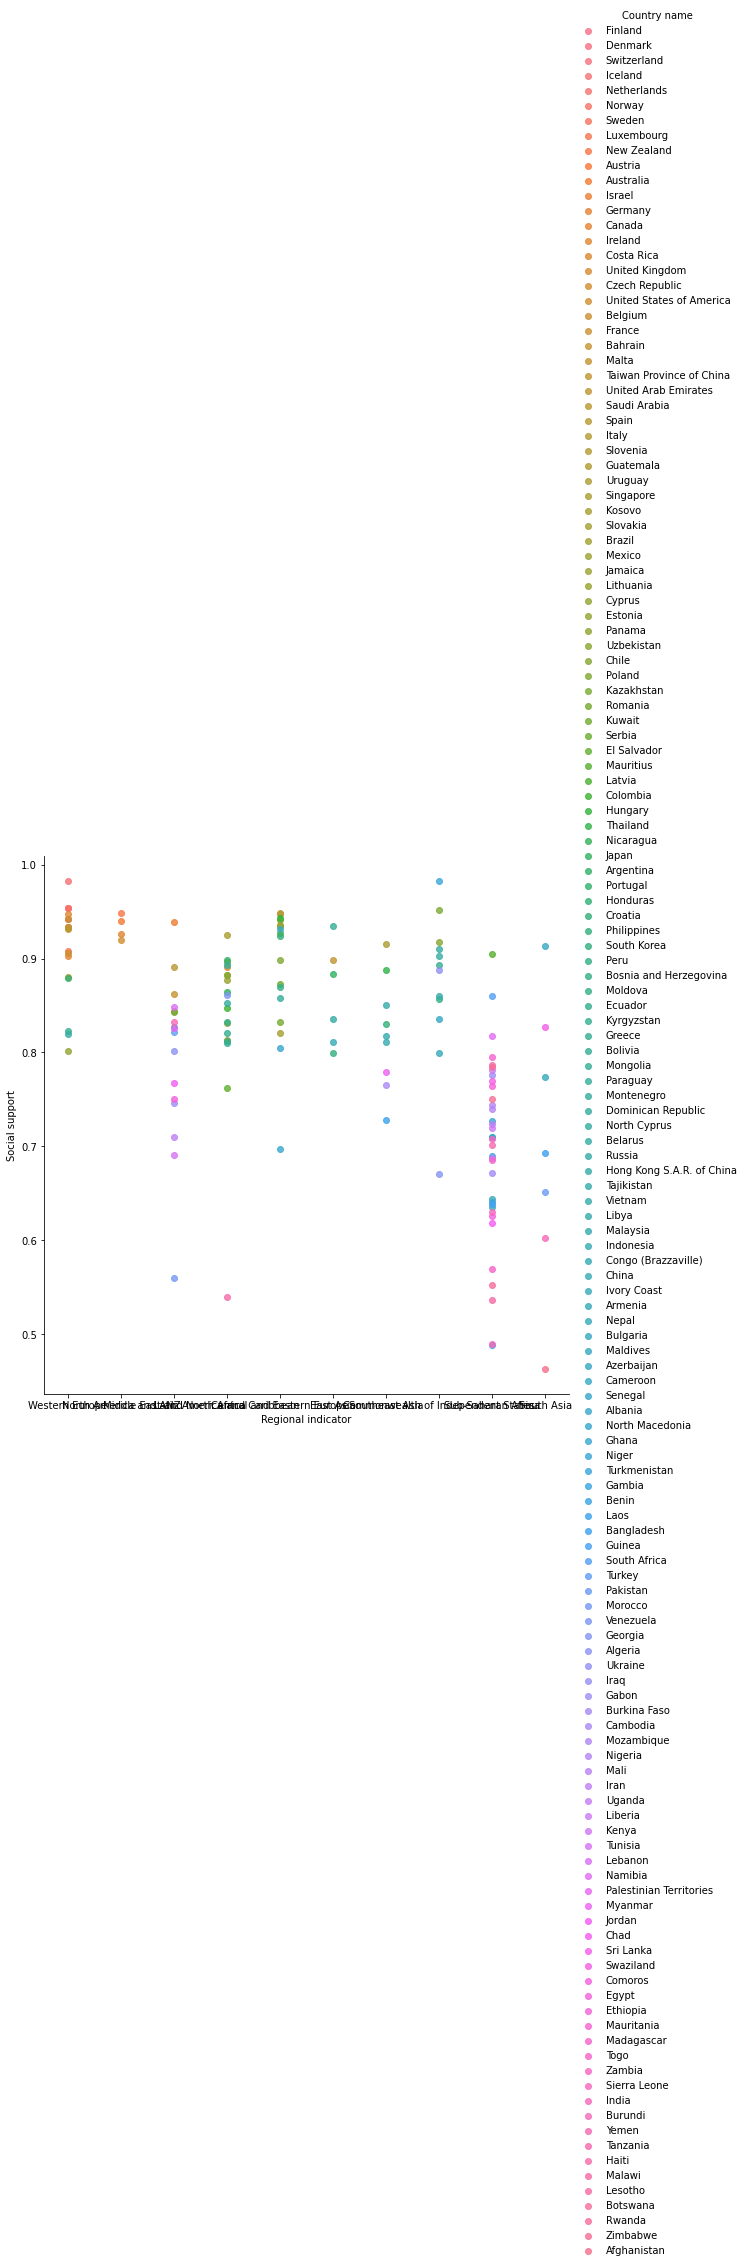

In [32]:
sns.lmplot('Regional indicator', 
           'Social support', 
           data=wh, 
           hue='Country name', 
           height=8, 
           fit_reg=False)

In [33]:
wh.groupby("Country name")["Social support"].mean().sort_values(ascending=False).head()

Country name
Iceland         0.983
Turkmenistan    0.983
Finland         0.954
Denmark         0.954
Norway          0.954
Name: Social support, dtype: float64

In [34]:
wh.groupby("Country name")["Social support"].mean().sort_values(ascending=False).tail()

Country name
Haiti          0.540
Malawi         0.537
Burundi        0.490
Benin          0.489
Afghanistan    0.463
Name: Social support, dtype: float64

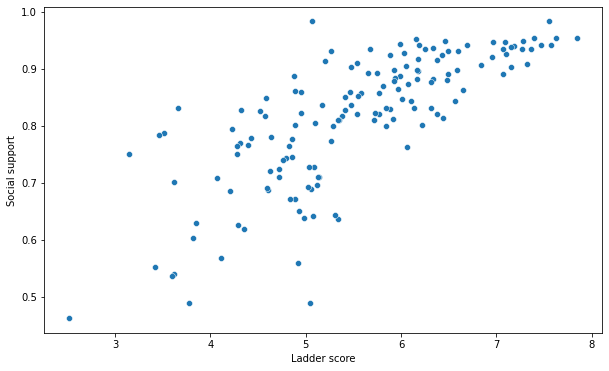

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=wh,x="Ladder score",y="Social support")
plt.show()

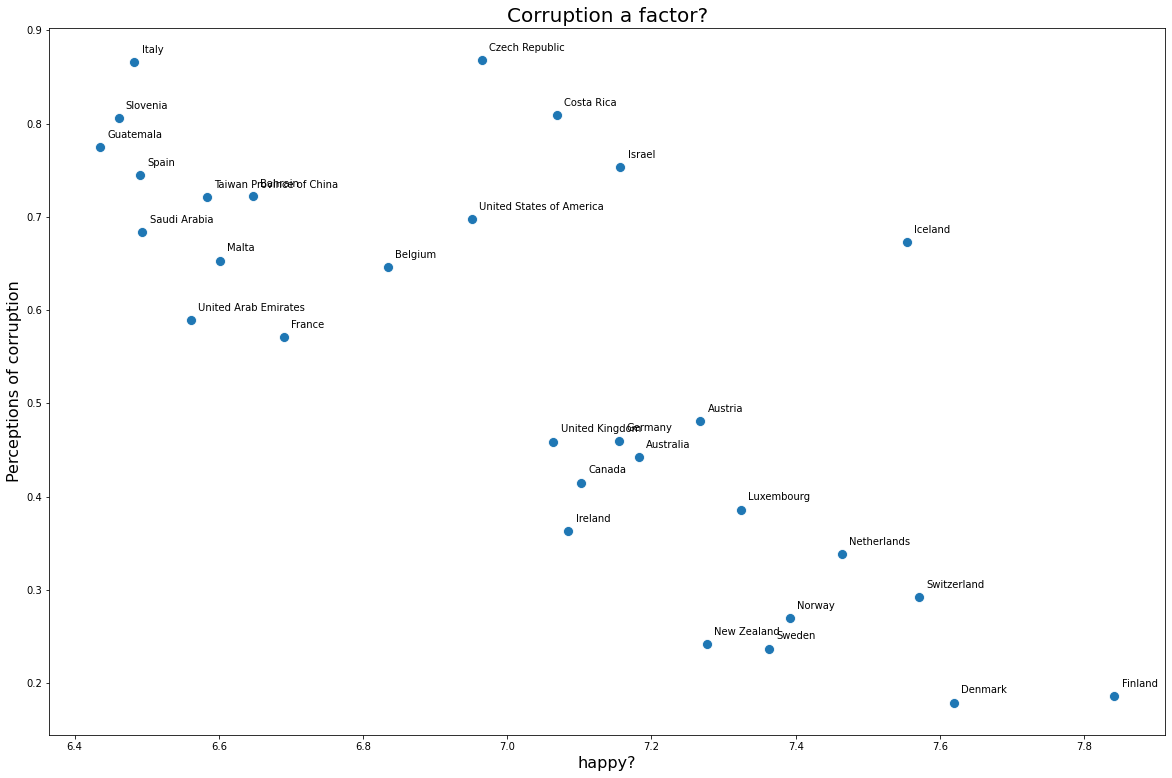

In [36]:
wh1=wh[:30]
plt.figure(figsize=(20,13))
sns.scatterplot(data=wh1,x="Ladder score",y="Perceptions of corruption",s=100)
plt.title("Corruption a factor?",fontsize=20)
plt.xlabel("happy?",fontsize=16)
plt.ylabel("Perceptions of corruption",fontsize=16)
for i in range(len(wh1)):
    plt.text(s=wh1.loc[i,"Country name"],
            x=wh1.loc[i,"Ladder score"]+0.01,y=wh1.loc[i,"Perceptions of corruption"]+0.01,fontsize=10)
plt.show()

<AxesSubplot:>

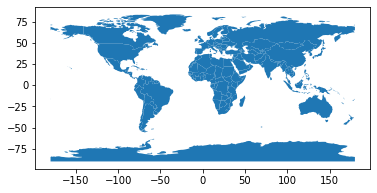

In [29]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()
world.plot()

In [30]:
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [31]:
world_hap = pd.merge(left=world, right=wh, left_on='name', right_on='Country name')

<AxesSubplot:>

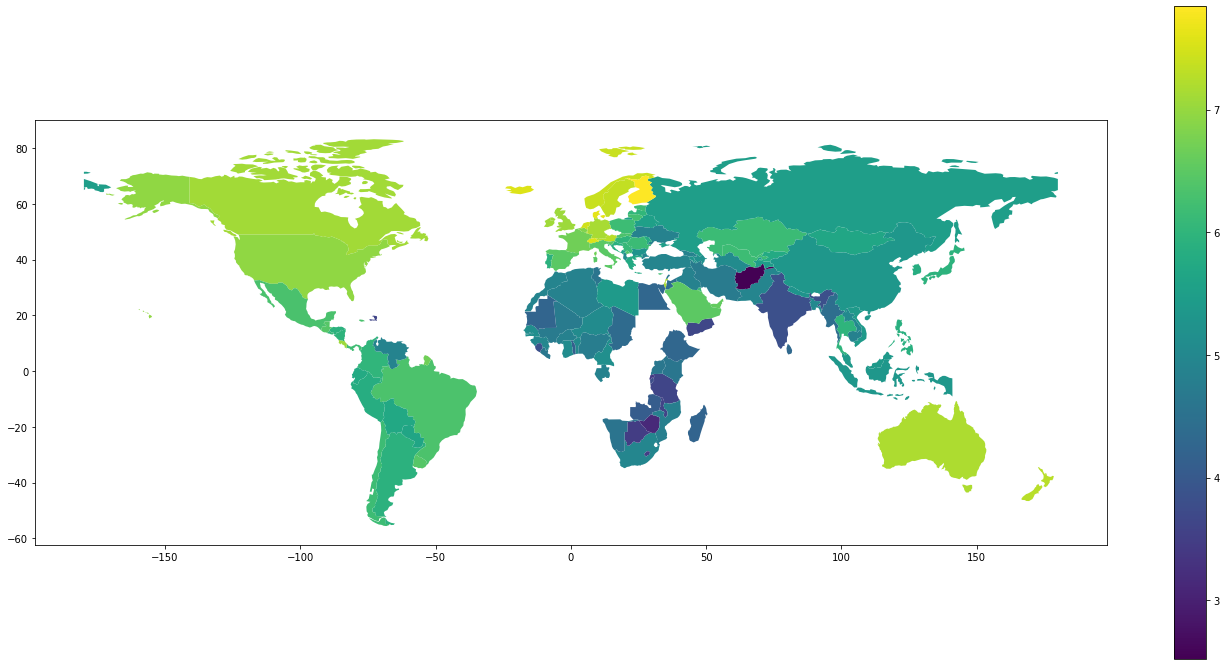

In [40]:
world_hap.plot(figsize=(24,12), column = 'Ladder score', legend = True)

<AxesSubplot:>

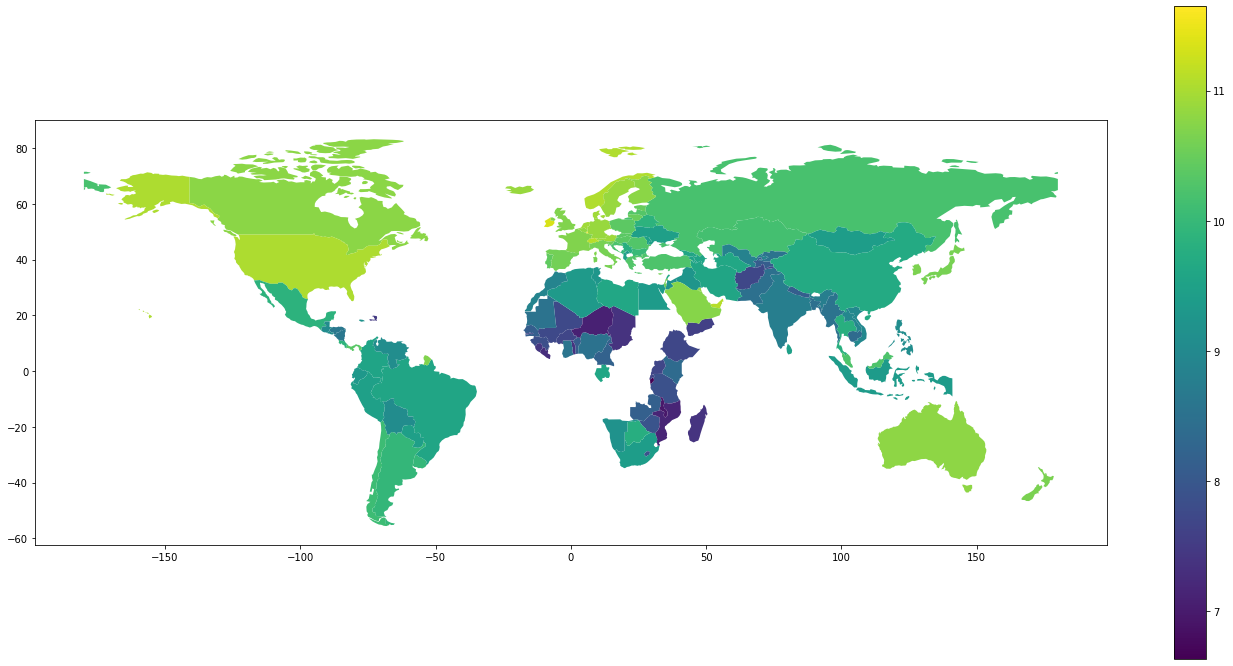

In [41]:
world_hap.plot(figsize=(24,12), column = 'Logged GDP per capita', legend = True)

<AxesSubplot:>

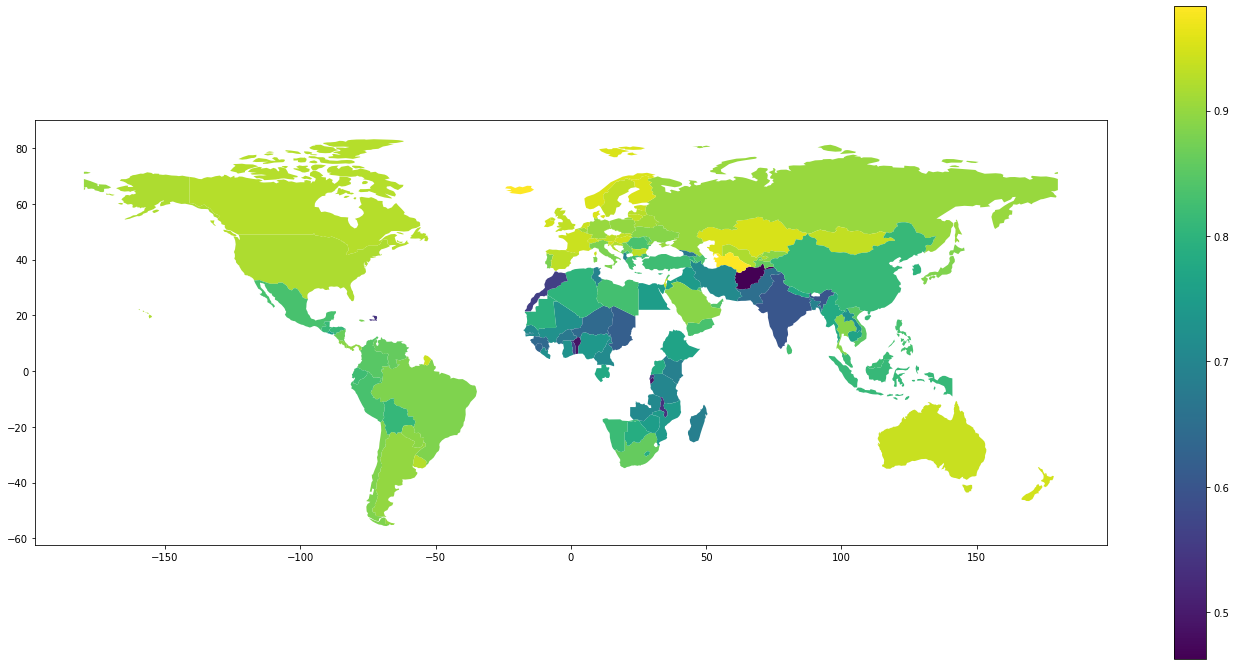

In [42]:
world_hap.plot(figsize=(24,12), column = 'Social support', legend = True)

<AxesSubplot:>

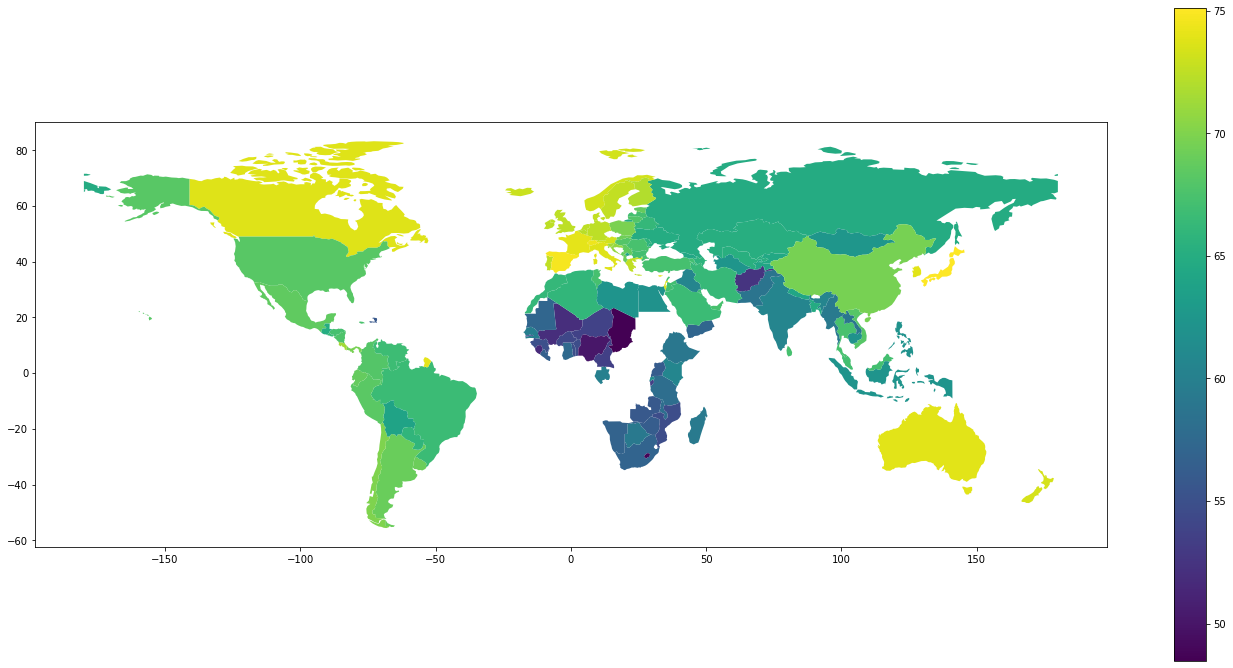

In [43]:
world_hap.plot(figsize=(24,12), column = 'Healthy life expectancy', legend = True)

<AxesSubplot:>

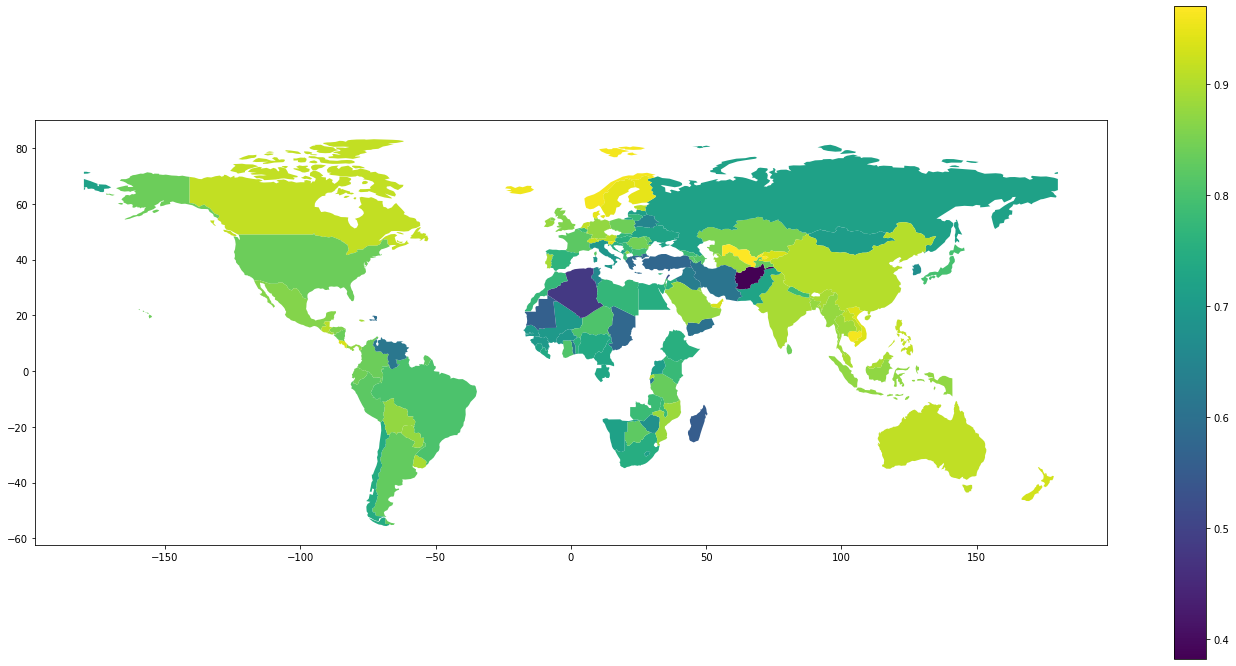

In [44]:
world_hap.plot(figsize=(24,12), column = 'Freedom to make life choices', legend = True)

<AxesSubplot:>

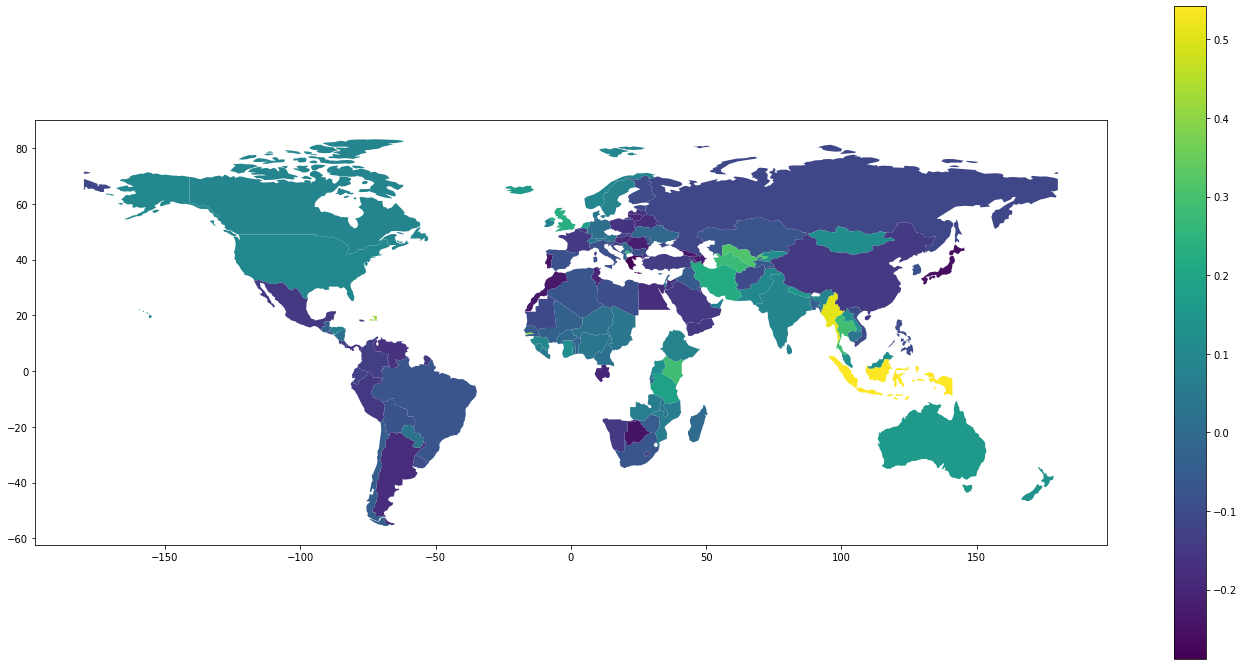

In [45]:
world_hap.plot(figsize=(24,12), column = 'Generosity', legend = True)

<AxesSubplot:>

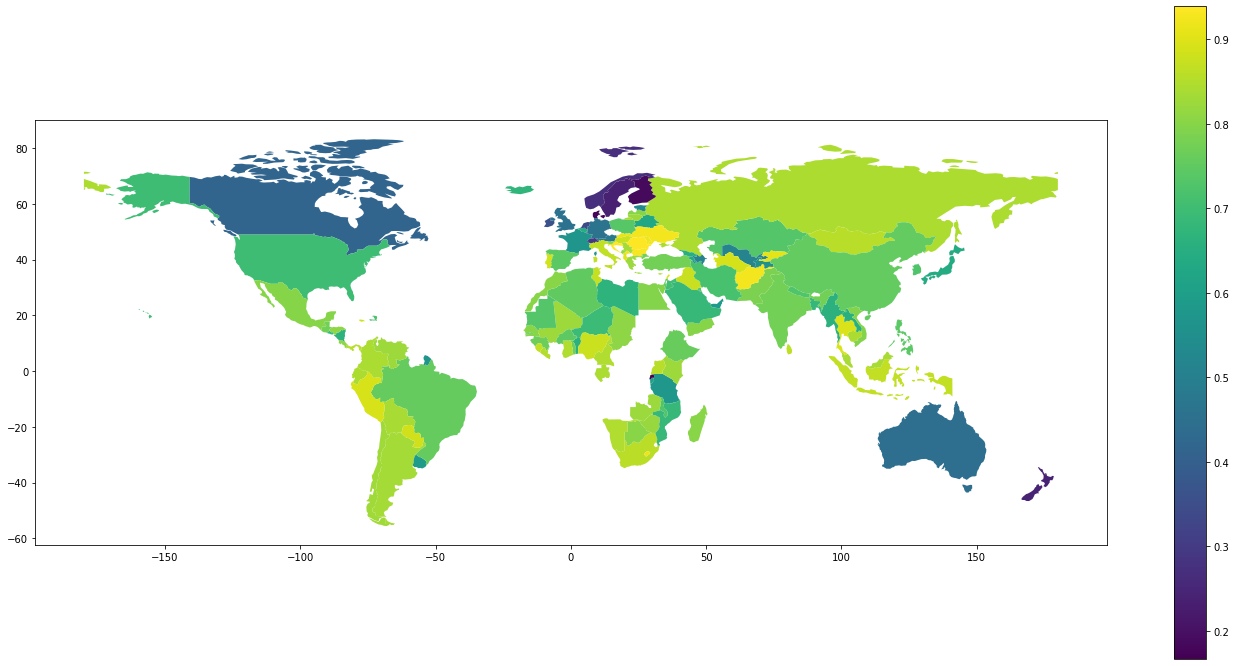

In [46]:
world_hap.plot(figsize=(24,12), column = 'Perceptions of corruption', legend = True)

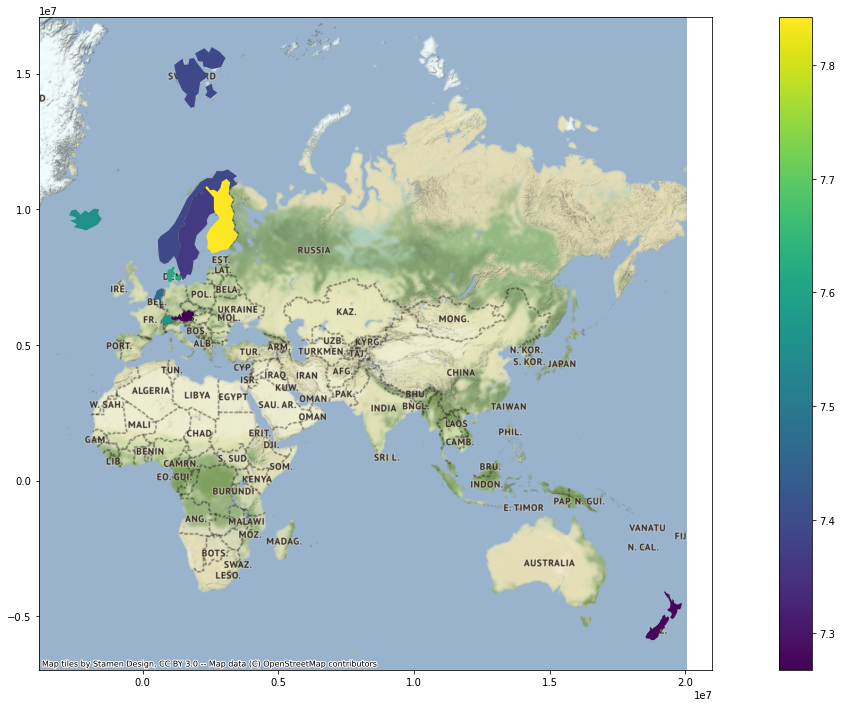

In [35]:
world_hap_sub = world_hap.sort_values('Ladder score', ascending=False).head(10)
world_hap_sub = world_hap_sub.to_crs(epsg = 3857)
ws1=world_hap_sub.plot(figsize=(24,12), column = 'Ladder score', legend = True)
ctx.add_basemap(ws1)

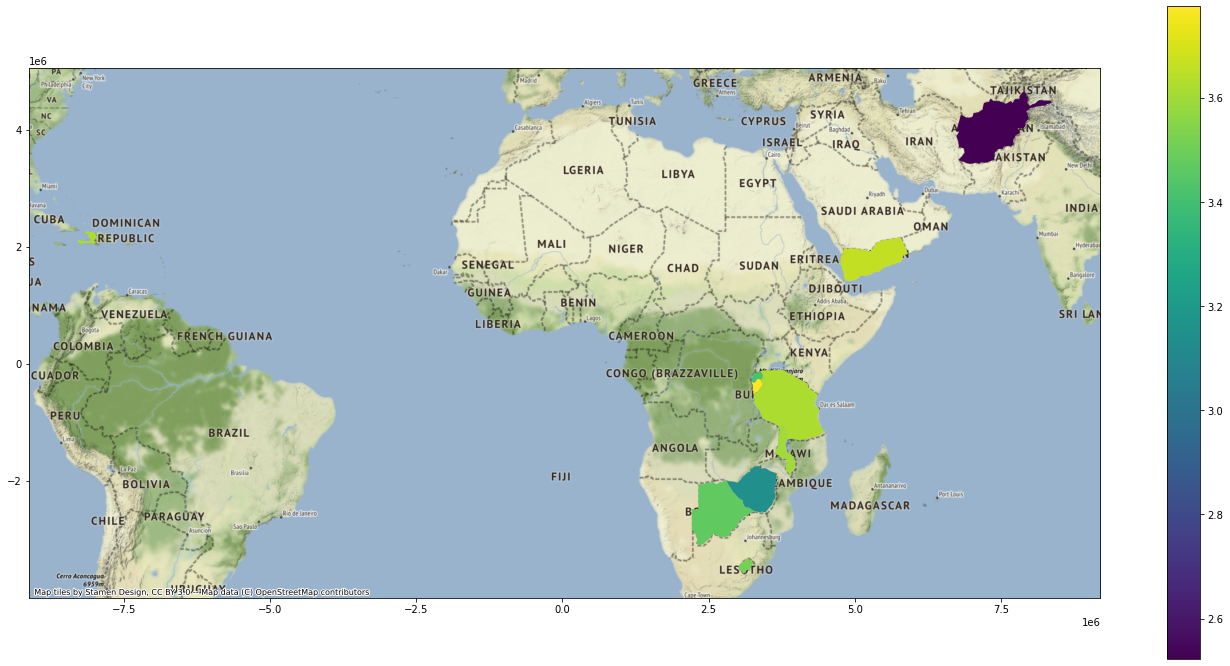

In [38]:
world_hap_sub = world_hap.sort_values('Ladder score', ascending=True).head(10)
world_hap_sub = world_hap_sub.to_crs(epsg = 3857)
ws2=world_hap_sub.plot(figsize=(24,12), column = 'Ladder score', legend = True)
ctx.add_basemap(ws2)

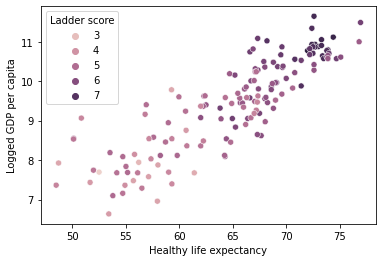

In [62]:
sns.scatterplot(x = wh["Healthy life expectancy"], y = wh["Logged GDP per capita"],hue = wh["Ladder score"]);

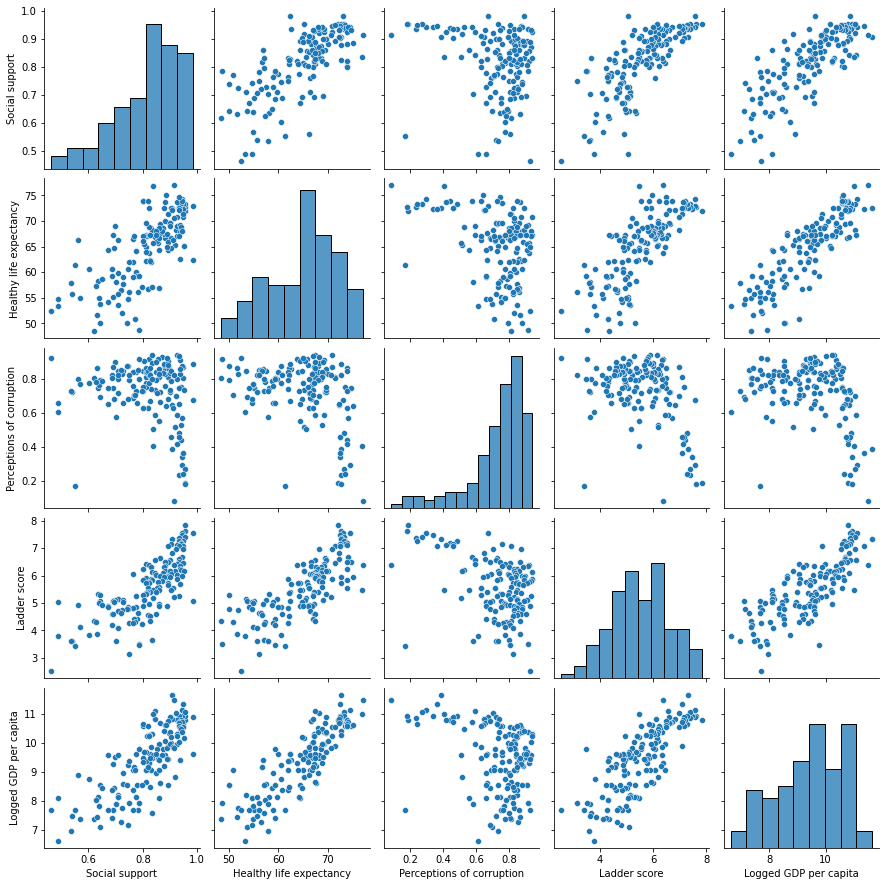

In [63]:
sns.pairplot(wh[["Social support","Healthy life expectancy","Perceptions of corruption","Ladder score","Logged GDP per capita"]])

In [7]:
wh2=pd.read_csv('/Users/KaidiCui/Desktop/Python/assignment3/worldhappiness/world-happiness-report.csv')

In [36]:
wh2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [37]:
wh2.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1944,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235
1948,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346


In [38]:
wh2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


<AxesSubplot:xlabel='year'>

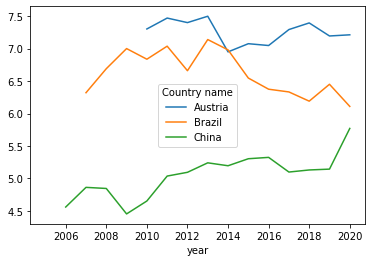

In [8]:
wh2subset = wh2[wh2['Country name'].isin(['Austria', 'China', 'Brazil'])]
wh2subset = wh2subset[["Life Ladder","year", "Country name"]]
wh2subset = wh2subset.pivot(index = "year", columns="Country name", values = "Life Ladder")
wh2subset.plot()

<AxesSubplot:xlabel='year'>

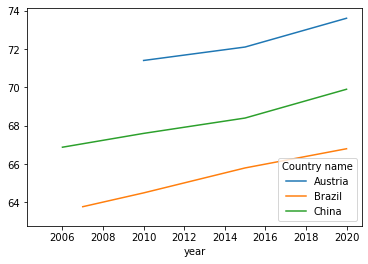

In [9]:
wh2subset = wh2[wh2['Country name'].isin(['Austria', 'China', 'Brazil'])]
wh2subset = wh2subset[["Healthy life expectancy at birth","year", "Country name"]]
wh2subset = wh2subset.pivot(index = "year", columns="Country name", values = "Healthy life expectancy at birth")
wh2subset.plot()

<AxesSubplot:xlabel='year'>

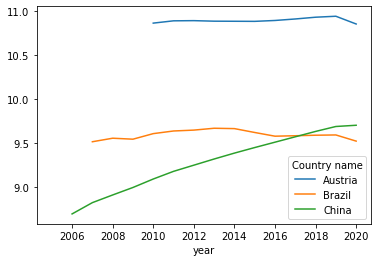

In [10]:
wh2subset = wh2[wh2['Country name'].isin(['Austria', 'China', 'Brazil'])]
wh2subset = wh2subset[["Log GDP per capita","year", "Country name"]]
wh2subset = wh2subset.pivot(index = "year", columns="Country name", values = "Log GDP per capita")
wh2subset.plot()